Head:

   loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

    loan_amount  loan_term  cibil_score  residential_assets_value  \
0      29900000         12          778                   2400000   
1      12200000          8          417                   2700000   
2      29700000         20          506                   7100000   
3      30700000          8          467                  18200000   
4      24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000

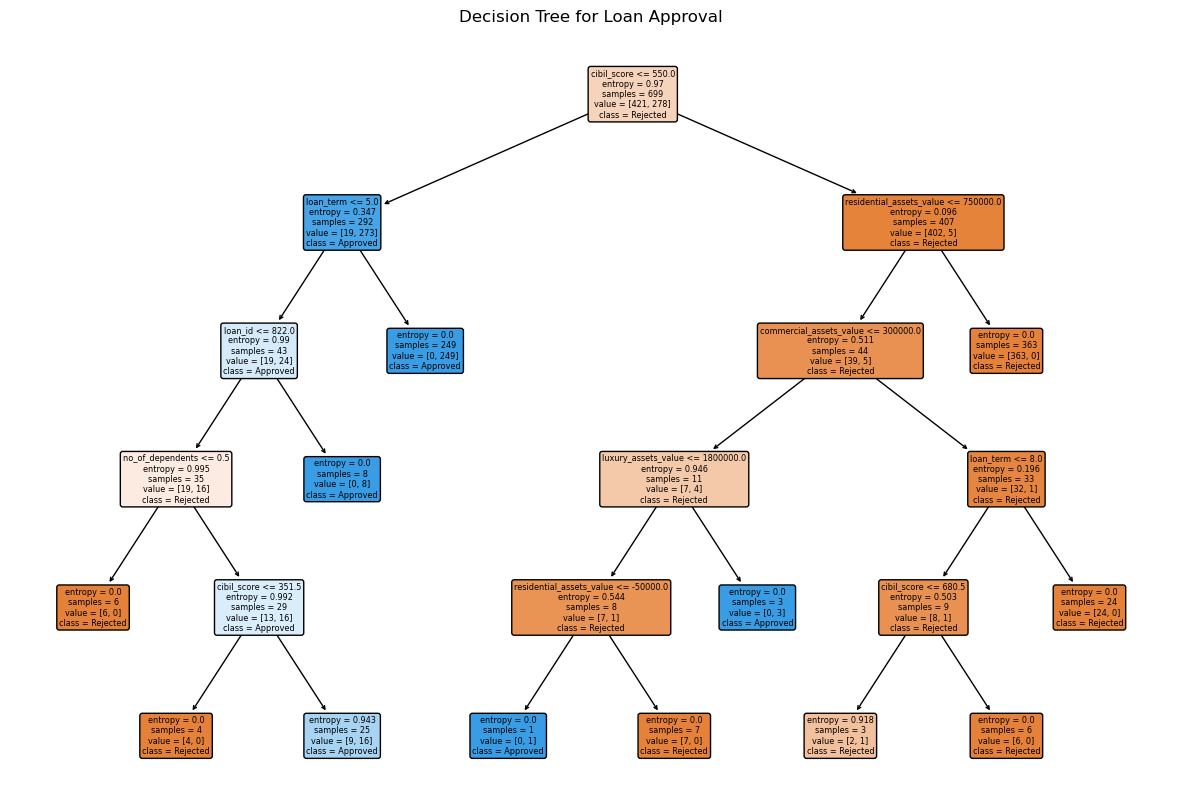

In [1]:
#step1: Load the requre lib
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

#step2: Load the data with the correct delimiter
df = pd.read_csv('loan_approval_data.csv')
df
# step3: explore the data (EDA)
print("Head:\n")
print(df.head())
print("Info:\n")
print(df.info())
print("Describe:\n")
df.describe()
#Step4: handle missing value
df.isnull().sum()
df['commercial_assets_value']=df['commercial_assets_value'].fillna(0)
#seperate numrical and categorical columns
#categorical columns are identified
num=df.select_dtypes(include=['object']).columns
num
#apply label encoding
leb={}
for col in num:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    leb[col]=le
print(df.head(20))

#how to convert numbers to original categories
#df['loan_status'] = leb['loan_status'].inverse_transform(df['loan_status'])

#step6: define features and target
#define feature 
X = df.drop('loan_status', axis=1)
y = df['loan_status']
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#add gridsearch cv technique for hypertune
# Define parameter grid
param_grid = {'max_depth': [3, 5, 10], 'criterion': ['gini', 'entropy']}
#train the data and take model
model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
grid=GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Hyperparameters:", grid.best_params_)

# Evaluate best model
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(15, 10))  # Adjust size for better visibility
tree.plot_tree(best_model, feature_names=X.columns, class_names=["Rejected", "Approved"], filled=True, rounded=True)
plt.title("Decision Tree for Loan Approval")
plt.show()
